In [35]:
#mounting drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
#importing libraries
import numpy as np
import pandas as pd
import csv

In [37]:
data= '/content/drive/My Drive/cancerdata/cancer_data.csv'
data=pd.read_csv(data)


In [38]:
data2= data[data.BareNuc != '?'] #getting all without with a '?'
data2.shape

(583, 11)

In [39]:
#ID-patirnt ID, clump- clump thickness, UnifSize- Uniformity of cell size, 
#MargAdh- Marginal Adhession, SingEpiSize- Single epithelial cell size, BareNuc- Bare nuclei, 
#Bland Chrom- Bland Chromatin, Norm Nucl- Normal Nucleoli, Mit- Mitoses, Class- #2 for Bening and #4 for Malignant.

In [40]:
data2['BareNuc'].median() #calculating the median of the column

1.0

In [41]:
#data.info()
data['BareNuc'].replace("?","1",inplace=True) #replacing the columns without values with the median value

In [42]:
data['BareNuc']=data['BareNuc'].astype('int')

In [43]:
data

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
593,1311875,5,1,2,1,2,1,1,1,1,2
594,1315506,4,8,6,3,4,10,7,1,1,4
595,1320141,5,1,1,1,2,1,2,1,1,2
596,1325309,4,1,2,1,2,1,2,1,1,2


In [44]:
features= data.drop(["Class", "ID"], axis=1)

In [45]:

X=np.array(features)
y=np.array(data["Class"])
y = y.reshape((len(y), 1))

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, random_state=0, test_size=0.2)

In [47]:
from sklearn.tree import DecisionTreeClassifier
tree= DecisionTreeClassifier()
tree.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [52]:
train_predict=tree.predict(X_train)
val_predict=tree.predict (X_test)


In [53]:
from sklearn.metrics import accuracy_score
print ('Training accuracy:', accuracy_score(y_true=y_train, y_pred= train_predict))
print ('Validation accuracy:', accuracy_score(y_true=y_test, y_pred= val_predict))

Training accuracy: 1.0
Validation accuracy: 0.925


In [54]:
y_pred=val_predict
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))  #Class- 2 for Bening and #4 for Malignant.

              precision    recall  f1-score   support

           2       0.96      0.93      0.94        82
           4       0.85      0.92      0.89        38

    accuracy                           0.93       120
   macro avg       0.91      0.92      0.92       120
weighted avg       0.93      0.93      0.93       120



In [16]:
!apt-get install graphviz
!pip install graphviz
import graphviz
from sklearn.tree import export_graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.


In [17]:
feature_names=features.columns

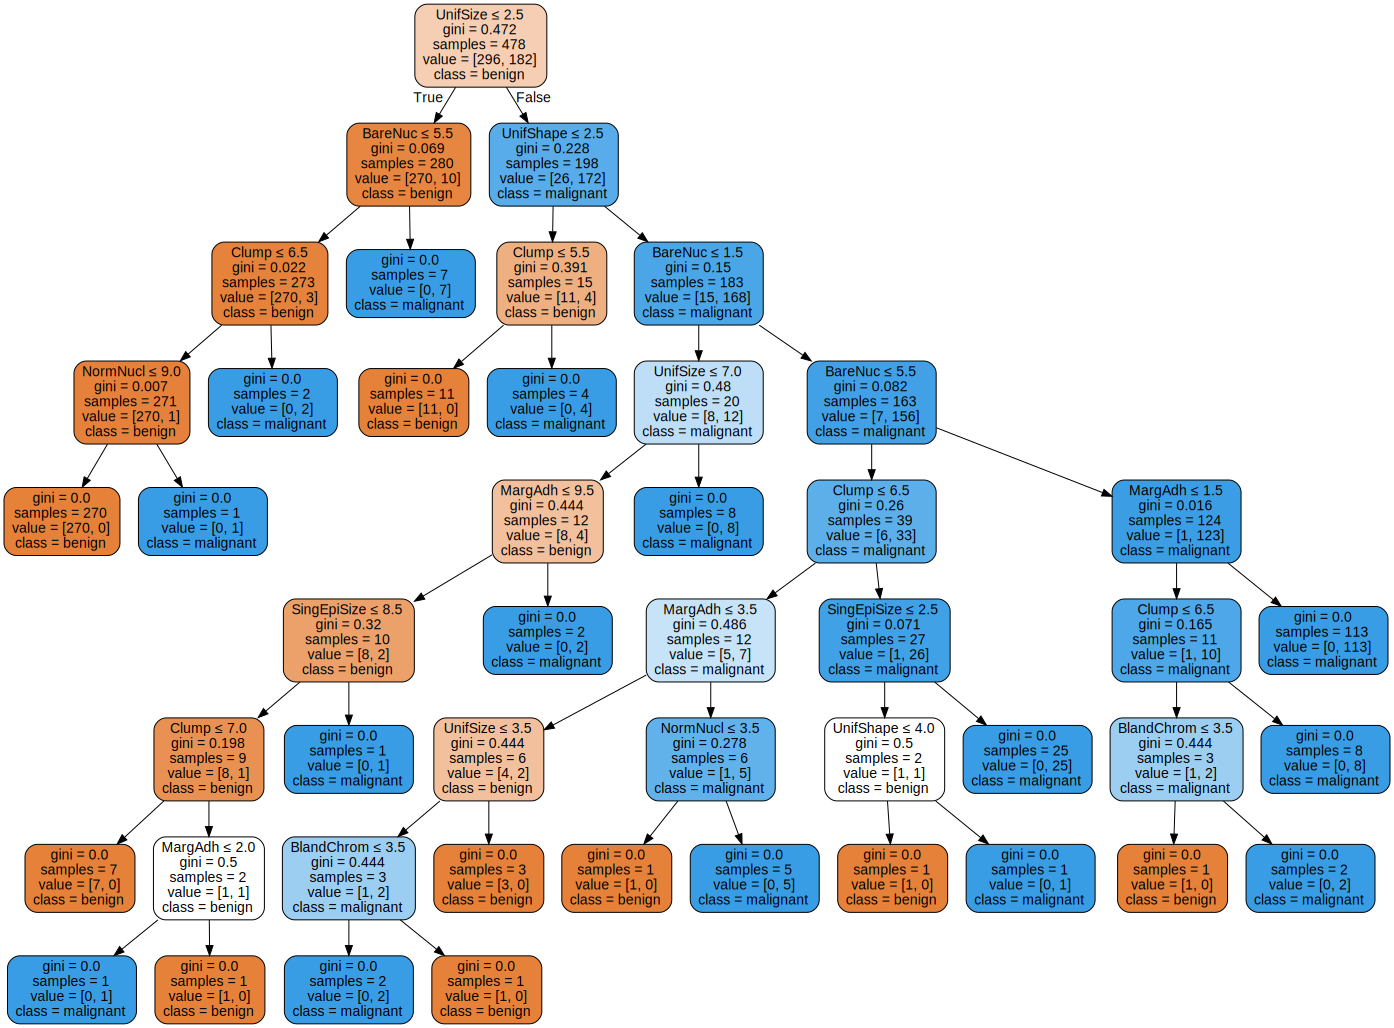

In [18]:
dot_data=export_graphviz(tree, out_file=None, feature_names=feature_names, class_names= ["benign", "malignant"], filled=True, rounded=True, special_characters=True)
graph=graphviz.Source(dot_data)
graph

In [55]:
#putting in new sets of Data

In [56]:
data_new= '/content/drive/My Drive/cancerdata/cancer_test_data.csv'
data_new=pd.read_csv(data_new)


In [57]:
data_new2= data_new[data_new.BareNuc != '?'] #getting all without with a '?'
data_new2.shape

(100, 11)

In [58]:
data_new2['BareNuc'].median() #calculating the median of the column

1.0

In [59]:
#data.info()
data_new['BareNuc'].replace("?","1",inplace=True) #replacing the columns without values with the median value

In [60]:
data_new['BareNuc']=data['BareNuc'].astype('int')


In [61]:
data_new
data_new.shape

(101, 11)

In [62]:
features_new= data_new.drop(["Class", "ID"], axis=1)

In [63]:
XX=np.array(features_new)
yy=np.array(data_new["Class"])
yy = yy.reshape((len(yy), 1))

In [64]:
XX_test,yy_test = (XX,yy)

In [65]:
yy_test.shape

(101, 1)

In [66]:
from sklearn.tree import DecisionTreeClassifier
tree_= DecisionTreeClassifier()
tree_.fit(XX_test,yy_test)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [67]:
val_predictt=tree.predict (XX_test)


In [68]:
from sklearn.metrics import accuracy_score

print ('inference accuracy on new data:', accuracy_score(y_true=yy_test, y_pred= val_predictt))

inference accuracy on new data: 0.7326732673267327


In [33]:
feature_names=features.columns

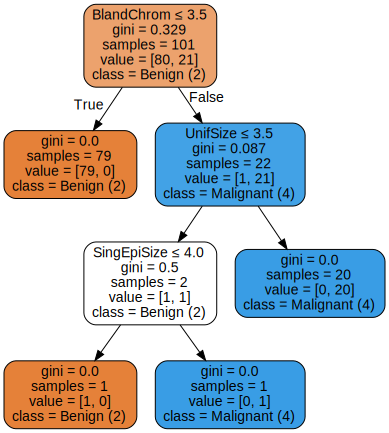

In [34]:
dot_data=export_graphviz(tree_, out_file=None, feature_names=feature_names, class_names= ["Benign (2)", "Malignant (4)"], filled=True, rounded=True, special_characters=True)
graph=graphviz.Source(dot_data)
graph